**Tugas**

**Mendeteksi orientasi teks dan jenis skrip**

Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.

In [88]:
import cv2
import imutils
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [89]:
def display_image(image, name):
    # Memisahkan channel warna (BGR) untuk konversi ke format RGB
    b, g, r = cv2.split(image)
    rgb_img = cv2.merge([r, g, b])

    # Menampilkan gambar
    plt.imshow(rgb_img)
    plt.title(name)
    plt.show()

def get_rotated_image_with_correct_orientation(image):
    # Menggunakan Tesseract untuk mendapatkan orientasi, rotasi, dan skrip teks yang terdeteksi
    orientation_results = pytesseract.image_to_osd(image, output_type=Output.DICT)
    
    # Menampilkan informasi orientasi
    print("Detected orientation: {} degrees".format(orientation_results["orientation"]))
    print("Rotate by {} degrees to correct".format(orientation_results["rotate"]))
    print("Detected script: {}".format(orientation_results["script"]))
    
    # Mendapatkan sudut rotasi dari hasil
    rotation_angle = orientation_results["rotate"]
    
    # Merotasi gambar menggunakan imutils.rotate_bound
    return imutils.rotate_bound(image, angle=rotation_angle)

def extract_text_from_image(image, language='eng', oem=3, psm=6):
    # Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
    custom_config = f'-l {language} --oem {oem} --psm {psm}'

    # Menambahkan tulisan sebelum hasil teks
    print("\nExtracted Text:")
    # Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar dengan konfigurasi khusus
    extracted_text = pytesseract.image_to_string(image, config=custom_config)
    print(extracted_text)  # Menampilkan teks yang diekstrak dari gambar

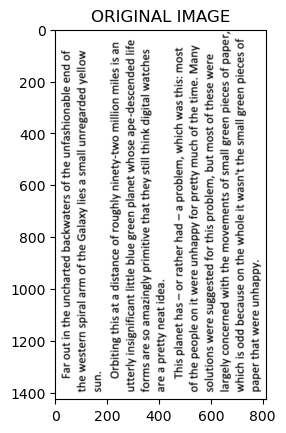

In [90]:
# Membaca gambar dari direktori
image_path = 'images/hitchhikers-rotated.png'
original_image = cv2.imread(image_path)

# Menampilkan gambar original
display_image(original_image, 'ORIGINAL IMAGE')

In [91]:
# Sebelum dirotasi
rotated_image = get_rotated_image_with_correct_orientation(original_image)
extract_text_from_image(original_image)

Detected orientation: 270 degrees
Rotate by 90 degrees to correct
Detected script: Latin

Extracted Text:
< 3 5
e SE ow > a)
oS 3
3 252 652839
o TH i)
o> 2es Bg 2 oe
Yo — 9s =< eeg
a wv az SEO9 SS
2 3 c¥Ys nPpltod
ct on = i) Es?
Ss = 9 ‘we orat
oO ® =os So*% bole)
xo YU Eac ee ofooR
“on x= “ry Va
oe o CSc 2£oge
= 5 Vo -= co 6 §&
e> =r Sey
2 ,©£= > +r Oo
= &§& ot EERED
= 0 ce > sei 2
io} evo B2EEDS
wo c ow og
oS s85 s52348
S> 52 aon 73
a we S recas
Za 2 VY wy aDFugaO
So = & > eoQe >So
o oO oa) 7 °
a Wu vx . 8 3
Pr 9s‘ o£5f&
nomer™) os c 2 2
3: cnt Ssrescs
ro oq a © o>Ste2
© np > ~eoertséa
@eE SES. Cc GZRSC ES
of SsEmea GYgxa
sa pone » oo 3 Cc
wo + oO TH an
ca vu 2ZE— & 5°22
£3 Ye a@f£OogEFEPs
ne ee “© + a2
c S 2 $
a ~*Gfos *€s5eogus
~ wo MaroASeSS
a 4+ cflov% 2B 5 2
on Ecetsasgev4 Es
” r= ot ac Vu s
ra 22 ay o> eT
o> ,.+e Ca &ELEDSSG
S SSE £58338
wc a = a4
2s -es5e "Seg FEs8
-~ un Sse O o8 ae ss


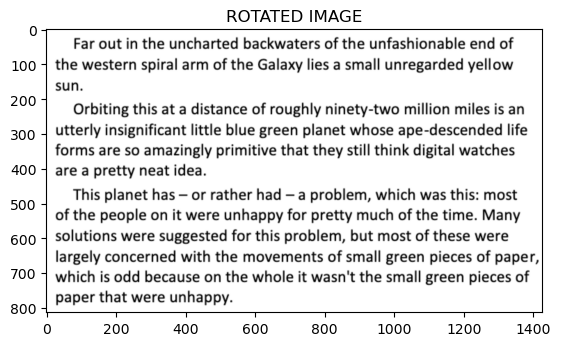

In [92]:
# Menampilkan gambar yang sudah dirotasi
display_image(rotated_image, 'ROTATED IMAGE')

In [93]:
# Setelah dirotasi
rotated_twice_image = get_rotated_image_with_correct_orientation(rotated_image)
extract_text_from_image(rotated_twice_image)

Detected orientation: 0 degrees
Rotate by 0 degrees to correct
Detected script: Latin

Extracted Text:
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had —a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.
